In [1]:
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt;import seaborn as sns

data=pd.read_csv(r'C:\Users\SONY\Desktop\DA\auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### Se observa que la columna 'horsepower' es del tipo object, sin embargo, los valores son numéricos. Hay que cambiarlos de tipo

In [3]:
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

Text(0.5, 1.0, 'Distribución Cilindros')

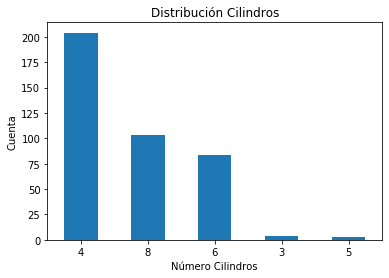

In [4]:
data['cylinders'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Número Cilindros')
plt.ylabel('Cuenta')
plt.title('Distribución Cilindros')

### Todas las casillas tienen datos, por lo que no hay que preocuparnos por valores nulos.

In [5]:
data.horsepower=data.horsepower.str.replace('?','NaN').astype(float)

In [6]:
data.horsepower.fillna(data.horsepower.mean(),inplace=True)

In [7]:
data.horsepower=data.horsepower.astype(int)

Text(0.5, 1.0, 'Primeros cinco valores de HP más común')

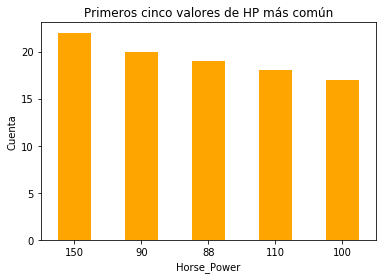

In [8]:
data.horsepower.value_counts().sort_values(ascending=False).head(5).plot(kind='bar',color='orange')
plt.xticks(rotation=0)
plt.xlabel('Horse_Power')
plt.ylabel('Cuenta')
plt.title('Primeros cinco valores de HP más común')

In [9]:
data['car name'] = data['car name'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
data['car name'] = data['car name'].str.replace('maxda|mazda','mazda')
data['car name'] = data['car name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
data['car name'] = data['car name'].str.replace('toyota|toyouta','toyota')
data['car name'] = data['car name'].str.replace('vokswagen|volkswagen|vw','volkswagen')
data.groupby(['car name']).sum().head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
amc ambassador brougham,13.0,8,360.0,175,3821,11.0,73,1
amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1
amc ambassador sst,17.0,8,304.0,150,3672,11.5,72,1
amc concord,43.7,10,383.0,180,6213,37.3,158,2
amc concord d/l,18.1,6,258.0,120,3410,15.1,78,1


In [10]:
data.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.46,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.17,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [11]:
data['origin']=data.origin.replace({1:'America',2:'Europa',3:'Asia'})

In [12]:
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,America,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,America,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,America,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,America,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,America,ford torino


In [13]:
df=pd.get_dummies(data=data,columns=['origin'])

In [14]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_America,origin_Asia,origin_Europa
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0


In [15]:
df.drop('car name',axis=1,inplace=True)

Text(0.5, 0, 'Millas por galon')

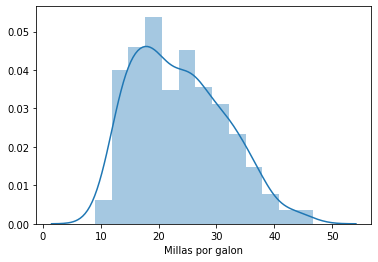

In [16]:
sns.distplot(df['mpg'])
plt.xlabel('Millas por galon')

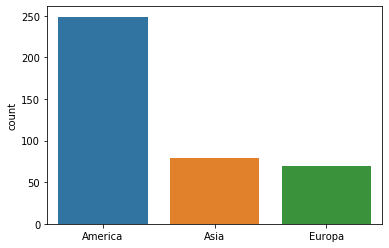

In [17]:
sns.countplot(data.origin.values,data=data)

### En la figura anterior se observa la producción de autos según su región de origen. Se observa que la gran mayoría son de precedencia americana.

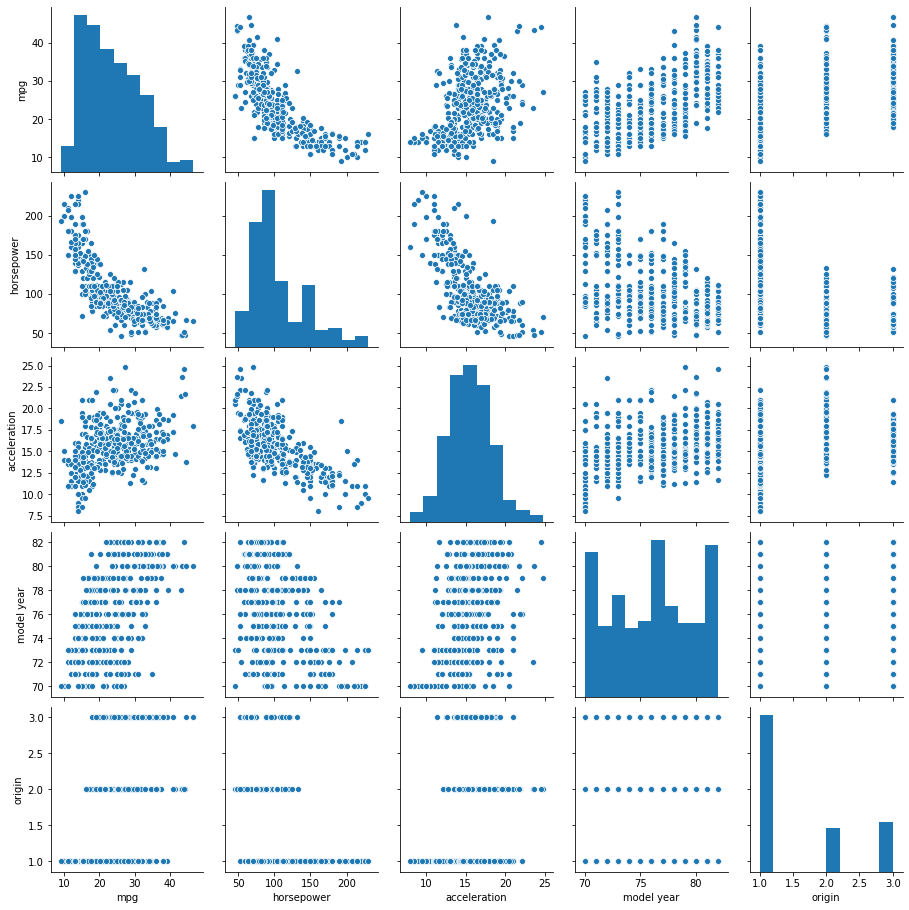

In [21]:
sns.pairplot(data[['mpg','horsepower','acceleration','model year','origin']])

In [19]:
data.origin.replace({'America':1,'Europa':2,'Asia':3},inplace=True)

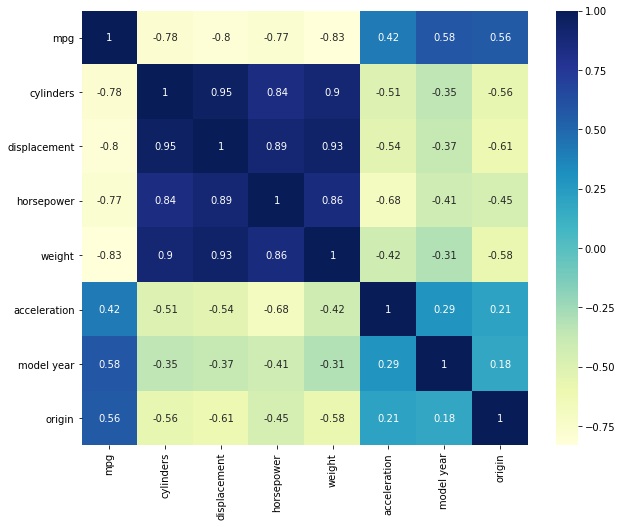

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(data=data.corr(),cmap='YlGnBu',annot=True)

### En la figura anterior se puede observar la matriz de correlación. Es evidente que alguna variables estan fuertemente correlacionadas ya sea positivamente o negativamente como es el caso de que a mayor peso del auto mayor consumo de combustible tendrá. 